In [1]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
ds= pd.read_csv('Social_Network_Ads.csv')
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
ds.duplicated().sum()

np.int64(0)

In [4]:
ds.drop_duplicates(inplace=True)

In [6]:
ds.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
#splitting dataset in Independent and Dependent variables
x=ds[['Age', 'EstimatedSalary']]
y=ds[['Purchased']]

In [8]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)

In [10]:
#train test split model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
#applying Random forest classifier
from sklearn.ensemble import RandomForestClassifier
cls= RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
cls.fit(x_train,y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
#checking accuracy
from sklearn.metrics import accuracy_score
y_pred= cls.predict(x_test)
score= accuracy_score(y_test,y_pred)
print(f"Accuracy : {score*100:.2f}%")

Accuracy : 89.13%


In [18]:
#myip
myip = cls.predict(sc.transform([[50,15]]))
myip

array([1])

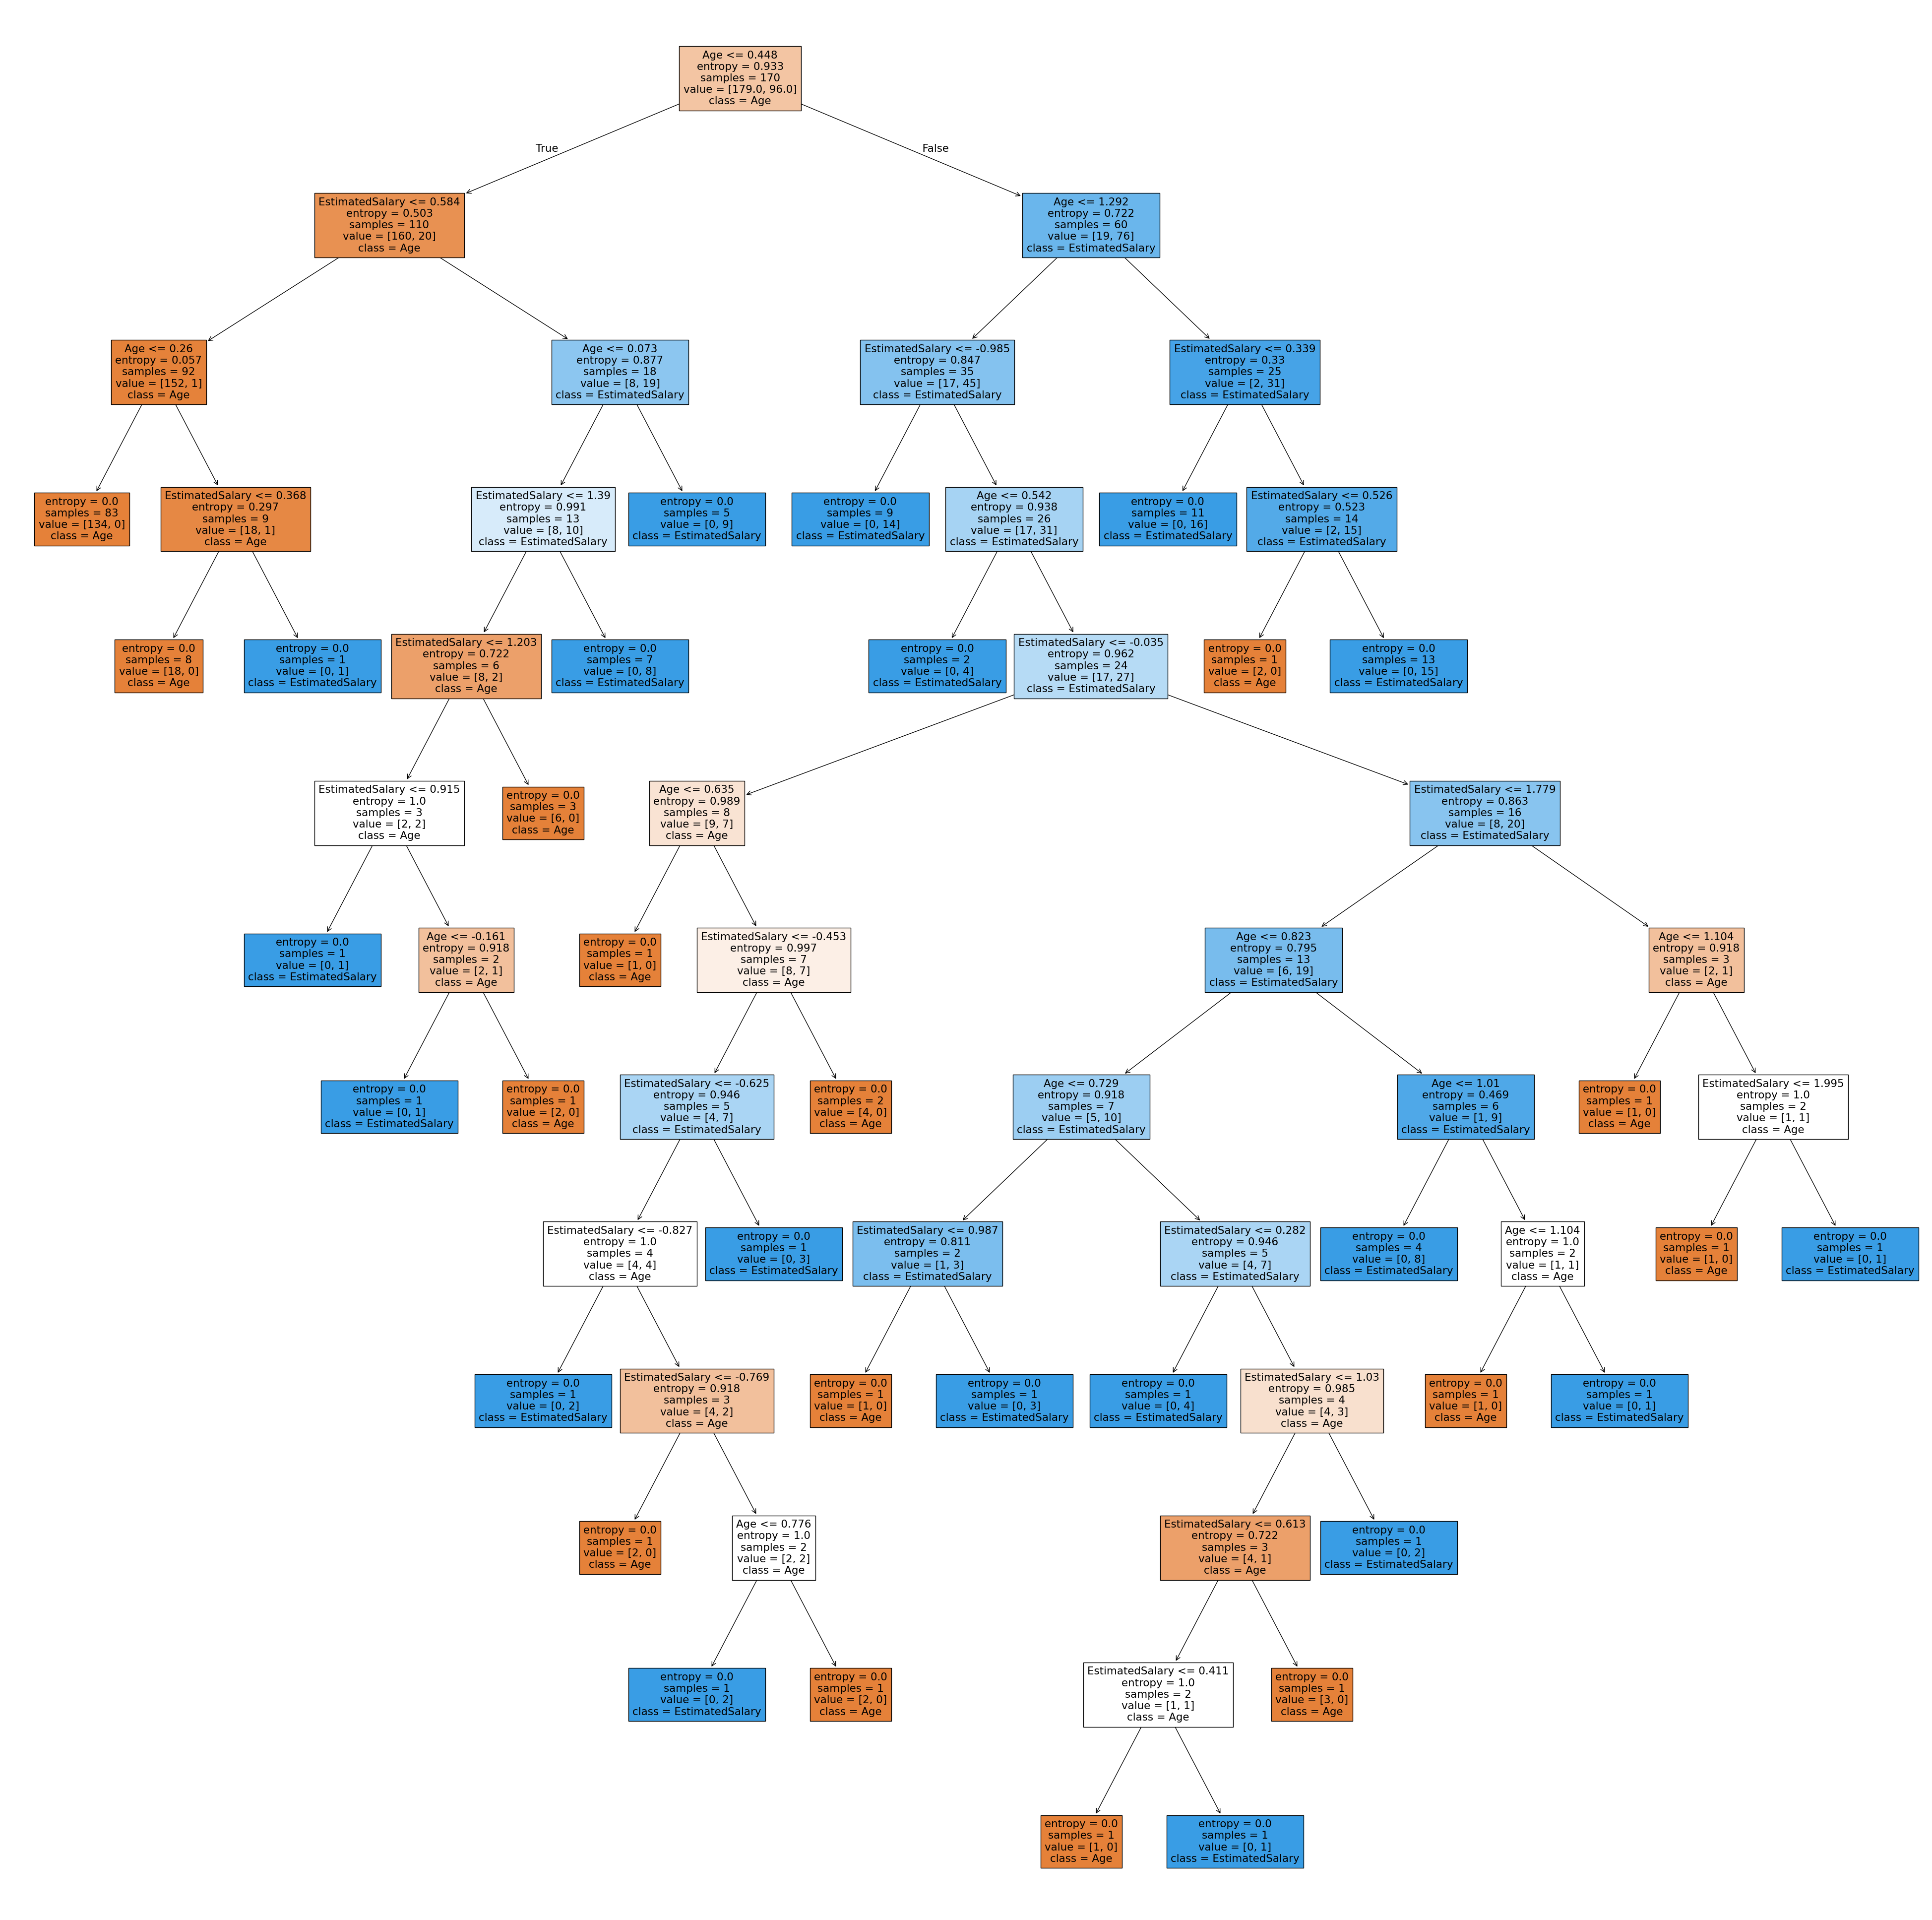

In [21]:
#plot graph
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))
plot_tree(cls.estimators_[0], feature_names=['Age', 'EstimatedSalary'], class_names=['Age', 'EstimatedSalary'], filled=True)
plt.show()

In [17]:
ds.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [24]:
#user ip
age= int(input('Enter age : '))
estimated_salary= int(input('Enter salary : '))

myip=pd.DataFrame(sc.transform([[age,estimated_salary]]), columns=['Age', 'EstimatedSalary'])
res= cls.predict(myip)

if res[0]==1:
    print('Prediction : user will purchase plane ')
else:
    print('Prediction : user will not purchase plane ')

Enter age :  1
Enter salary :  50


Prediction : user will not purchase plane 
